In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Import data files
house_metadata = "london_housing_market.csv"

# Read the house data and the study results
house_metadata = pd.read_csv(house_metadata)

# Display the data table for preview
house_metadata.head()

,AreaCode,Area,Year,mean_salary,population_size,AveragePrice,SalesVolume
0,E09000001,City of London,1999,"48,922",6581,"171,300",45
1,E09000001,City of London,2000,"52,203",7014,"218,679",36
2,E09000001,City of London,2001,"62,819",7359,"250,626",31
3,E09000001,City of London,2002,"56,450",7280,"269,632",33
4,E09000001,City of London,2003,"64,272",7115,"270,811",40


In [19]:
house_metadata.dtypes

AreaCode           object
Area               object
Year                int64
mean_salary        object
population_size     int64
AveragePrice       object
SalesVolume         int64
dtype: object

In [20]:
#  Data Cleaning: convert the 'mean_salary' columns which is an object to int64
house_metadata['mean_salary'] = house_metadata['mean_salary'].str.replace(',','').astype('int64')
house_metadata['AveragePrice'] = house_metadata['AveragePrice'].str.replace(',','').astype('int64')

In [21]:
house_metadata.dtypes

AreaCode           object
Area               object
Year                int64
mean_salary         int64
population_size     int64
AveragePrice        int64
SalesVolume         int64
dtype: object

In [22]:
house_metadata_2018 = house_metadata[house_metadata['Year']==2018]
house_metadata_2018.head()

,AreaCode,Area,Year,mean_salary,population_size,AveragePrice,SalesVolume
19,E09000001,City of London,2018,90028,8706,784958,33
39,E09000002,Barking and Dagenham,2018,32671,211998,295185,161
59,E09000003,Barnet,2018,36776,392140,533216,326
79,E09000004,Bexley,2018,34496,247258,342673,255
99,E09000005,Brent,2018,35830,330795,492937,166


The correlation between Average Salary and Average House Price is 0.47


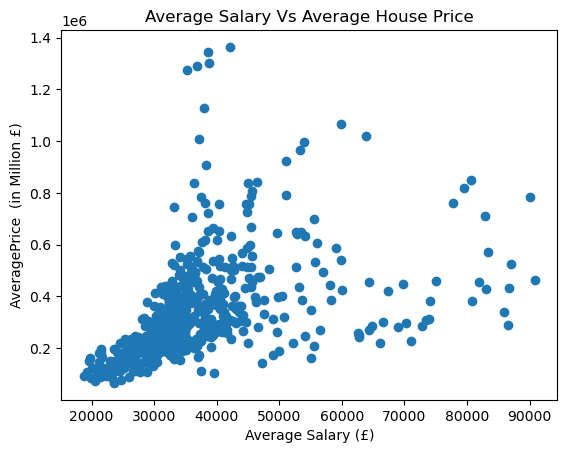

In [35]:
# Determine which pairs of factors are correlated: 
# Average Salary Vs Average House Price
plt.scatter(house_metadata.iloc[:,3],house_metadata.iloc[:,5])
plt.xlabel('Average Salary (£)')
plt.ylabel('AveragePrice  (in Million £)')
plt.title('Average Salary Vs Average House Price')




# So in this chart each dot represents a London borough at an specific moment in time. The correlation coefficient of 0.47 
# that you see here indicates a moderate correlation between the Average House Price and the Average Salary.
# For instance, in this graph although we see in the bottom left corner a strong correlation between lower house prices 
# and lower salaries, as salaries and house prices increase the correlation becomes weaker as we can see a bigger spread
# as we move up towards the right of the graph.Meaning that that despite being in a low salary you might leave in an affluent
#  borough 

# Pearson correlation coefficient between "Average Salary" and "Average House Price"
# Correlation coefficients between 0.5-0.7 indicate moderately correlated variables,between 0.3-0.5 indicates low correlation.

mean_salary = house_metadata.iloc[:,3]
AveragePrice = house_metadata.iloc[:,5]
correlation = st.pearsonr(mean_salary,AveragePrice)
print(f"The correlation between Average Salary and Average House Price is {round(correlation[0],2)}")

plt.show()

The correlation between Average Salary and Average House Price is 0.44


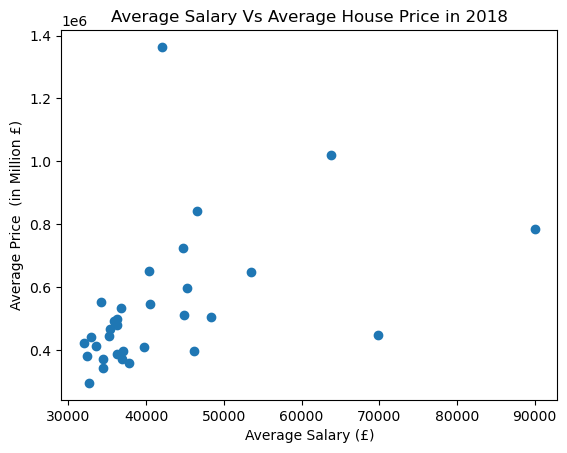

In [33]:
# Determine which pairs of factors are correlated: 
# Average Salary Vs Average House Price in 2018
plt.scatter(house_metadata_2018.iloc[:,3],house_metadata_2018.iloc[:,5])
plt.xlabel('Average Salary (£)')
plt.ylabel('Average Price  (in Million £)')
plt.title('Average Salary Vs Average House Price in 2018')

# Pearson correlation coefficient between "Average Salary" and "Average House Price"
# 0.47 indicates a moderate positive correlation - Correlation coefficients between 0.5 - 0.7 indicate that the variables 
# are moderately correlated / between 0.3 - 0.5 indicates low correlation.

mean_salary = house_metadata_2018.iloc[:,3]
AveragePrice = house_metadata_2018.iloc[:,5]
correlation = st.pearsonr(mean_salary,AveragePrice)
print(f"The correlation between Average Salary and Average House Price is {round(correlation[0],2)}")

plt.show()

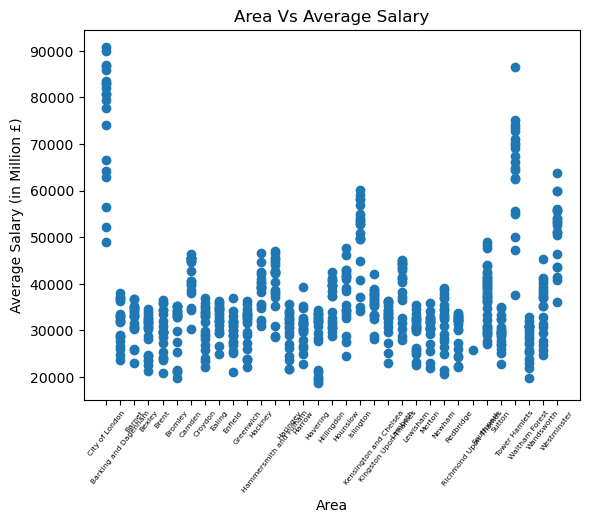

In [25]:
# Determine which pairs of factors are correlated: 
# Area Vs Average Salary

# Here we see the average salary per borough. What stands out is how City of London, Southwark, Tower Hamlets and 
# Westminster are the London boroughs with the highest Average Salaries


plt.scatter(house_metadata.iloc[:,1],house_metadata.iloc[:,3],)
plt.xlabel('Area')
plt.xticks(rotation = 52,fontsize=5.5)
plt.ylabel('Average Salary (in Million £)')
plt.title('Area Vs Average Salary')

plt.show()

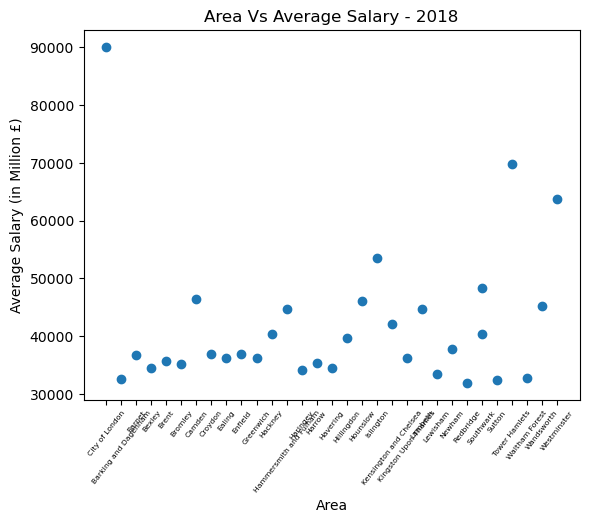

In [26]:
# Determine which pairs of factors are correlated: 
# Area Vs Average Salary

plt.scatter(house_metadata_2018.iloc[:,1],house_metadata_2018.iloc[:,3],)
plt.xlabel('Area')
plt.xticks(rotation = 52,fontsize=5.5)
plt.ylabel('Average Salary (in Million £)')
plt.title('Area Vs Average Salary - 2018')

plt.show()

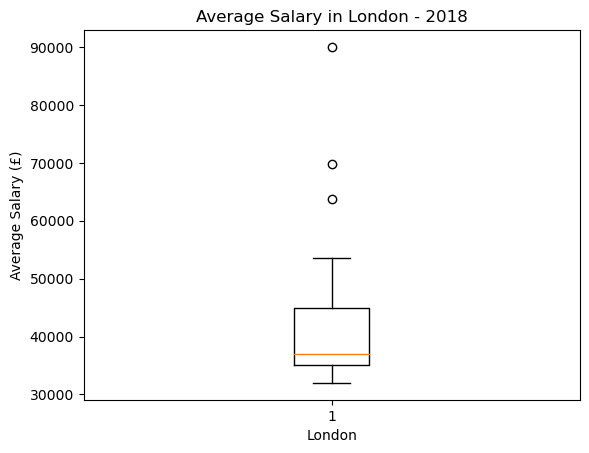

In [31]:
# Outlier plot of Average Salary in London
# This graph shows the avarage salary in London in 2018 - the minimum is 31,990 which is in the London borough 
# Redbridge, the median is almost 37,000 and the max outlier shows what was mentioned in the previous slide that the 
# london boroughs of City of London, Southwark, Tower Hamlets and Westminster 


salaries = house_metadata_2018['mean_salary']

fig1, ax1 = plt.subplots()
ax1.set_title('Average Salary in London - 2018')
ax1.set_xlabel('London')
ax1.set_ylabel('Average Salary (£)')
ax1.boxplot(salaries)
plt.show()

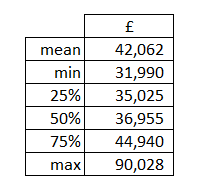

In [28]:
house_metadata_2018['mean_salary'].describe()

count       32.000000
mean     42062.281250
std      12353.778571
min      31990.000000
25%      35024.750000
50%      36955.000000
75%      44939.750000
max      90028.000000
Name: mean_salary, dtype: float64

The correlation between Year Vs Sales Volume is -0.48


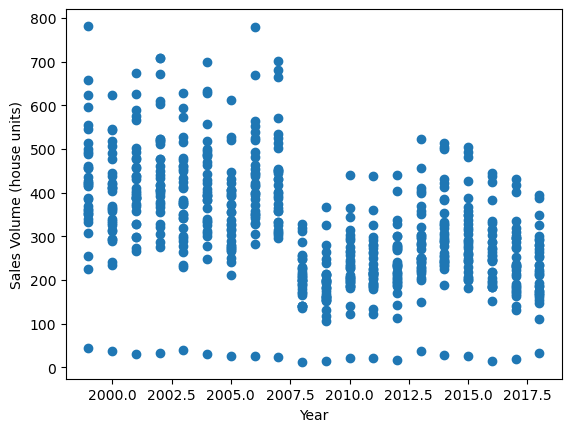

In [29]:
# Determine which pairs of factors are correlated: 
# Year Vs Sales Volume

plt.scatter(house_metadata.iloc[:,2],house_metadata.iloc[:,6])
plt.xlabel('Year')
plt.ylabel('Sales Volume (house units)')


# Pearson correlation coefficient between "Average Salary" and "Sales Volume"
Year = house_metadata.iloc[:,2]
SalesVolume = house_metadata.iloc[:,6]
correlation = st.pearsonr(Year,SalesVolume)
print(f"The correlation between Year Vs Sales Volume is {round(correlation[0],2)}")
#  negative or inverse correlation, indicates that when one variable increases the other decreases and vice-versa

plt.show()

In [ ]:
house_metadata_2018.to_csv('london_2018.csv')

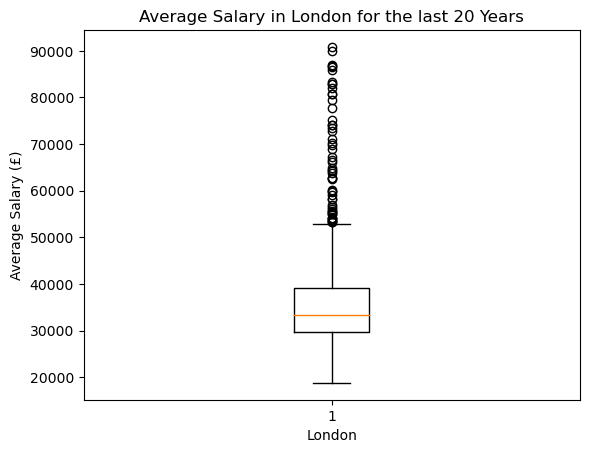

In [13]:
# Outlier plot of Average Salary in London

salaries = house_metadata['mean_salary']

fig1, ax1 = plt.subplots()
ax1.set_title('Average Salary in London for the last 20 Years')
ax1.set_xlabel('London')
ax1.set_ylabel('Average Salary (£)')
ax1.boxplot(salaries)
plt.show()